In [20]:
import clingo
from clingraph import compute_graphs
from clingraph.orm import Factbase

In [21]:
instance1 = """

graph(windy).
node(1, windy).
node(2, windy).
node(3, windy).

edge((1,2), windy).
edge((1,3), windy).
edge((2,1), windy).
edge((2,3), windy).
edge((3,1), windy).
edge((3,2), windy).

edge_weight((1,2), 10, windy).
edge_weight((2,3), 10, windy).
edge_weight((3,1), 10, windy).
edge_weight((2,1), 100, windy).
edge_weight((3,2), 100, windy).
edge_weight((1,3), 100, windy).

attr(edge, E, label, W) :- edge(E, G), edge_weight(E, W, G).
attr(edge, E, dir, forward) :- edge(E, G).

"""

In [22]:
ctl = clingo.Control()
ctl.configuration.solve.models = 1
ctl.add("base", (), instance1)
ctl.ground([("base", ())])
with ctl.solve(yield_=True) as solve_handle:
    solve_handle.get()
    model = solve_handle.model()
    fb = Factbase()
    fb.add_model(model)

print(fb)

attr(edge,(3,1),(label,-1),10).
attr(edge,(2,1),(dir,-1),forward).
attr(edge,(3,2),(dir,-1),forward).
attr(edge,(3,1),(dir,-1),forward).
attr(edge,(1,2),(label,-1),10).
attr(edge,(2,1),(label,-1),100).
attr(edge,(2,3),(label,-1),10).
attr(edge,(3,2),(label,-1),100).
attr(edge,(2,3),(dir,-1),forward).
attr(edge,(1,2),(dir,-1),forward).
attr(edge,(1,3),(dir,-1),forward).
attr(edge,(1,3),(label,-1),100).
graph(windy).
edge((1,2),windy).
edge((1,3),windy).
edge((2,1),windy).
edge((2,3),windy).
edge((3,1),windy).
edge((3,2),windy).
node(1,windy).
node(2,windy).
node(3,windy).



In [23]:
graphs = compute_graphs(fb)
graphs

{'windy': <graphviz.graphs.Graph at 0x7efdfc2f4580>}

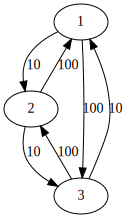

In [24]:
graphs['windy']